## **Data Exploration**

In [107]:
import numpy as np
import pandas as pd

In [108]:
# from google.colab import drive
# drive.mount('/content/drive')

In [109]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [110]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [111]:
data = data.drop('id', axis=1)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [113]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [114]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [115]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [116]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [117]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [118]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [119]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [120]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [121]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [122]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [124]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=42)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

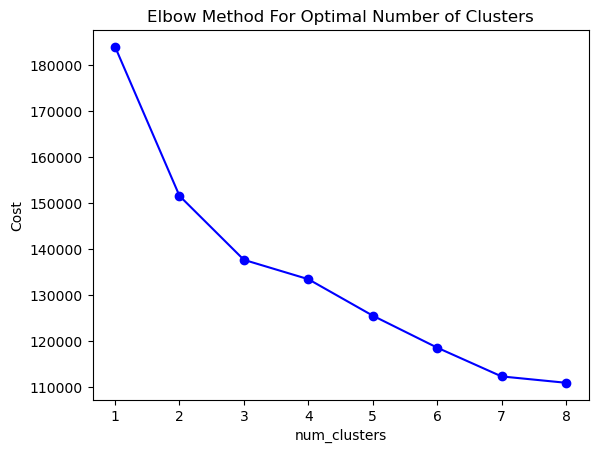

In [125]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [126]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [127]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


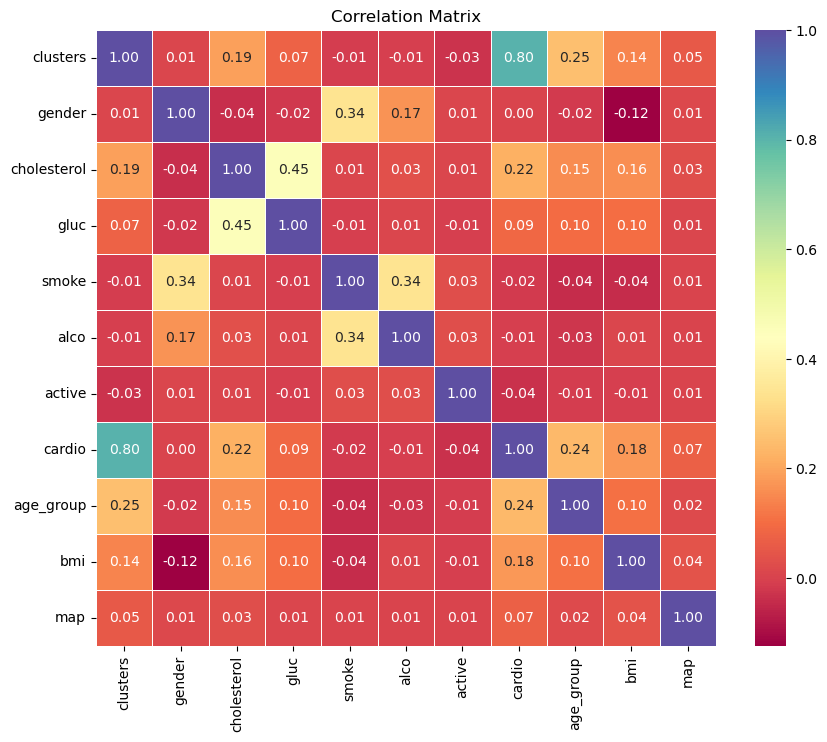

In [128]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

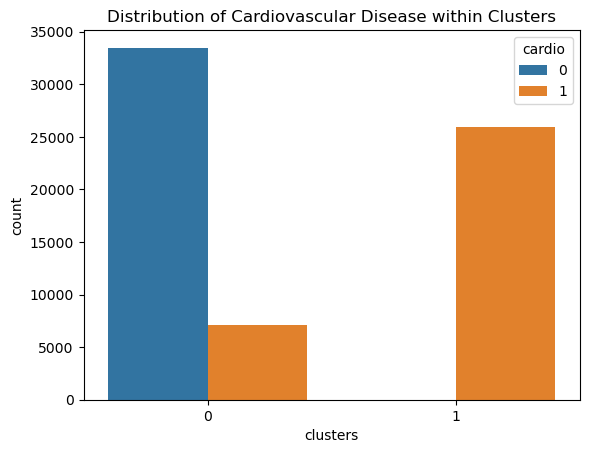

In [129]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [130]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [131]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [132]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [133]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [134]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.23573288 -0.7446001   1.41856649 ...  1.56180434 -0.57572478
  -0.15149036]
 [-0.99618903 -0.51568339 -0.19579241 ... -0.06640011 -0.52962497
   0.01875678]
 [-0.79600832 -0.41772806 -0.40855354 ... -0.21258204 -0.56044216
   0.05761285]
 ...
 [ 1.31469723  2.57514652 -0.43098935 ...  1.39502629  0.77256351
  -0.07421097]
 [-0.80455535 -0.54772463 -0.34162295 ... -0.71281815  0.63319953
  -0.22499507]
 [-0.86278081 -0.63156261 -0.32068868 ... -0.82337561 -0.69638233
   0.03659177]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.27634677 -0.49817204 -0.23933586 ...  0.62003007  0.49245545
  -0.04788558]
 [ 1.1989257   0.84843998 -0.44842819 ...  0.51297366  0.63374054
  -0.05447684]
 [-0.77021339  2.46797561 -0.51536601 ... -0.82350383 -0.59714676
  -0.17696722]
 ...
 [ 1.45486435  0.96856287 -0.27940207 ...  0.57946324 -0.62909547
  -0.06847227]
 [ 1.39422653 -0.47427245 -0.46152992 ...  1.43564906  0.75891046
  -0.06999946]
 [-0.74017028 -0

In [135]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [137]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # If out has 3 dimensions, select the last time step output
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
        # If out has 2 dimensions (sequence length is 1), directly pass through the fully connected layer
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [138]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [139]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [141]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)

rnn_model = RNNModel()
batch_size = 64
epochs = 100
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/100, Average Loss: 0.38915567790806793
Epoch 5/100, Average Loss: 0.16726919522635825
Epoch 10/100, Average Loss: 0.15177342886263182
Epoch 15/100, Average Loss: 0.14910455588852206
Epoch 20/100, Average Loss: 0.14851144349632012
Epoch 25/100, Average Loss: 0.1478512477410096
Epoch 30/100, Average Loss: 0.1475821354425331
Epoch 35/100, Average Loss: 0.14739980035892097
Epoch 40/100, Average Loss: 0.14716881274589502
Epoch 45/100, Average Loss: 0.14706081625968753
Epoch 50/100, Average Loss: 0.14700397058627085
Epoch 55/100, Average Loss: 0.1469875618530573
Epoch 60/100, Average Loss: 0.14677247187409778
Epoch 65/100, Average Loss: 0.14658708538828927
Epoch 70/100, Average Loss: 0.14674451434484093
Epoch 75/100, Average Loss: 0.1466969778781296
Epoch 80/100, Average Loss: 0.14651694780342467
Epoch 85/100, Average Loss: 0.14622346465359023
Epoch 90/100, Average Loss: 0.14637367152291814
Epoch 95/100, Average Loss: 0.1464695975745237
Epoch 100/100, Average Loss: 0.1462340237018669

In [142]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


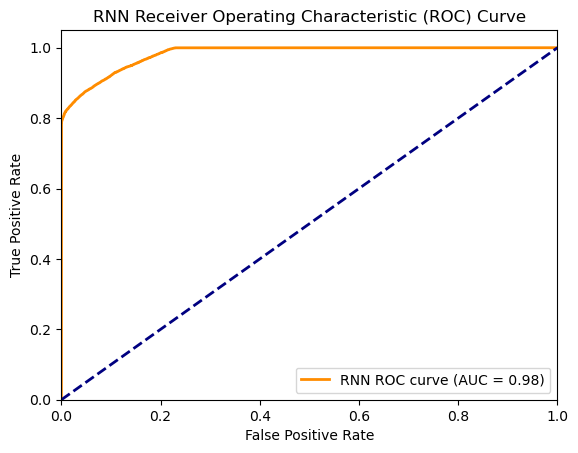

In [143]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [144]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=40, batch_size=batch_size)

Epoch 1/40
837/837 [==============================] - 0s 368us/step - loss: 0.2978 - accuracy: 0.8679
Epoch 2/40
837/837 [==============================] - 0s 360us/step - loss: 0.1560 - accuracy: 0.9076
Epoch 3/40
837/837 [==============================] - 0s 361us/step - loss: 0.1515 - accuracy: 0.9104
Epoch 4/40
837/837 [==============================] - 0s 361us/step - loss: 0.1504 - accuracy: 0.9115
Epoch 5/40
837/837 [==============================] - 0s 364us/step - loss: 0.1493 - accuracy: 0.9114
Epoch 6/40
837/837 [==============================] - 0s 362us/step - loss: 0.1485 - accuracy: 0.9118
Epoch 7/40
837/837 [==============================] - 0s 362us/step - loss: 0.1483 - accuracy: 0.9120
Epoch 8/40
837/837 [==============================] - 0s 377us/step - loss: 0.1478 - accuracy: 0.9117
Epoch 9/40
837/837 [==============================] - 0s 361us/step - loss: 0.1473 - accuracy: 0.9126
Epoch 10/40
837/837 [==============================] - 0s 361us/step - loss: 0.147

419/419 [==============================] - 0s 247us/step


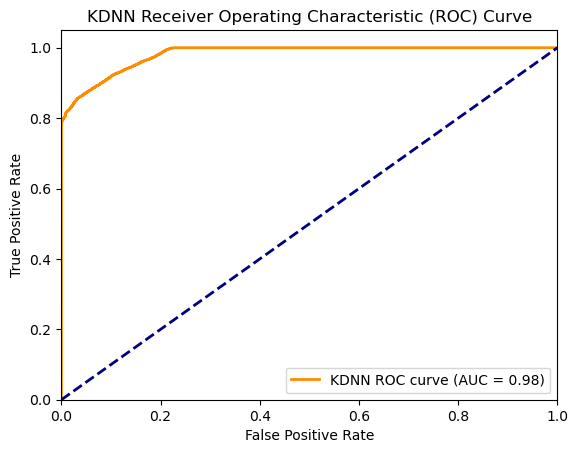

In [145]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [146]:
!pip install catboost
from catboost import CatBoostClassifier

In [147]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5549212	total: 8.77ms	remaining: 8.76s
1:	learn: 0.4540733	total: 13.1ms	remaining: 6.55s
2:	learn: 0.3790785	total: 18.2ms	remaining: 6.04s
3:	learn: 0.3277448	total: 23.5ms	remaining: 5.85s
4:	learn: 0.2897347	total: 28.9ms	remaining: 5.75s
5:	learn: 0.2590692	total: 34.4ms	remaining: 5.7s
6:	learn: 0.2342452	total: 39.2ms	remaining: 5.56s
7:	learn: 0.2168747	total: 43.8ms	remaining: 5.43s
8:	learn: 0.2028739	total: 48.5ms	remaining: 5.34s
9:	learn: 0.1972771	total: 53ms	remaining: 5.25s
10:	learn: 0.1893611	total: 58ms	remaining: 5.22s
11:	learn: 0.1828078	total: 63.8ms	remaining: 5.25s
12:	learn: 0.1781421	total: 69.2ms	remaining: 5.26s
13:	learn: 0.1741336	total: 73.9ms	remaining: 5.21s
14:	learn: 0.1710848	total: 79.2ms	remaining: 5.2s
15:	learn: 0.1685354	total: 84.1ms	remaining: 5.17s
16:	learn: 0.1654790	total: 88.8ms	remaining: 5.13s
17:	learn: 0.1642479	total: 94.9ms	remaining: 5.18s
18:	learn: 0.1619172	total: 100ms	remaining: 5.16s

188:	learn: 0.1442140	total: 1s	remaining: 4.3s
189:	learn: 0.1441723	total: 1.01s	remaining: 4.3s
190:	learn: 0.1440536	total: 1.01s	remaining: 4.29s
191:	learn: 0.1440219	total: 1.02s	remaining: 4.29s
192:	learn: 0.1439902	total: 1.02s	remaining: 4.28s
193:	learn: 0.1439529	total: 1.03s	remaining: 4.28s
194:	learn: 0.1439047	total: 1.03s	remaining: 4.28s
195:	learn: 0.1438160	total: 1.04s	remaining: 4.27s
196:	learn: 0.1437815	total: 1.04s	remaining: 4.26s
197:	learn: 0.1437347	total: 1.05s	remaining: 4.25s
198:	learn: 0.1436679	total: 1.06s	remaining: 4.25s
199:	learn: 0.1436194	total: 1.06s	remaining: 4.25s
200:	learn: 0.1435695	total: 1.07s	remaining: 4.24s
201:	learn: 0.1435260	total: 1.07s	remaining: 4.23s
202:	learn: 0.1434595	total: 1.08s	remaining: 4.22s
203:	learn: 0.1434157	total: 1.08s	remaining: 4.22s
204:	learn: 0.1433754	total: 1.09s	remaining: 4.21s
205:	learn: 0.1433409	total: 1.09s	remaining: 4.2s
206:	learn: 0.1433029	total: 1.1s	remaining: 4.2s
207:	learn: 0.143263

348:	learn: 0.1368535	total: 1.81s	remaining: 3.37s
349:	learn: 0.1368099	total: 1.81s	remaining: 3.37s
350:	learn: 0.1367626	total: 1.82s	remaining: 3.36s
351:	learn: 0.1367315	total: 1.82s	remaining: 3.36s
352:	learn: 0.1366780	total: 1.83s	remaining: 3.35s
353:	learn: 0.1366474	total: 1.83s	remaining: 3.35s
354:	learn: 0.1366292	total: 1.84s	remaining: 3.34s
355:	learn: 0.1365993	total: 1.84s	remaining: 3.33s
356:	learn: 0.1365540	total: 1.85s	remaining: 3.33s
357:	learn: 0.1365108	total: 1.85s	remaining: 3.32s
358:	learn: 0.1364348	total: 1.86s	remaining: 3.32s
359:	learn: 0.1363930	total: 1.86s	remaining: 3.31s
360:	learn: 0.1363362	total: 1.87s	remaining: 3.31s
361:	learn: 0.1362993	total: 1.87s	remaining: 3.3s
362:	learn: 0.1362516	total: 1.88s	remaining: 3.3s
363:	learn: 0.1361965	total: 1.88s	remaining: 3.29s
364:	learn: 0.1361551	total: 1.89s	remaining: 3.28s
365:	learn: 0.1361117	total: 1.89s	remaining: 3.28s
366:	learn: 0.1360727	total: 1.9s	remaining: 3.28s
367:	learn: 0.1

508:	learn: 0.1302585	total: 2.62s	remaining: 2.52s
509:	learn: 0.1302187	total: 2.62s	remaining: 2.52s
510:	learn: 0.1301758	total: 2.63s	remaining: 2.51s
511:	learn: 0.1301382	total: 2.63s	remaining: 2.51s
512:	learn: 0.1300949	total: 2.64s	remaining: 2.5s
513:	learn: 0.1300658	total: 2.64s	remaining: 2.5s
514:	learn: 0.1300348	total: 2.65s	remaining: 2.49s
515:	learn: 0.1300030	total: 2.65s	remaining: 2.49s
516:	learn: 0.1299567	total: 2.66s	remaining: 2.48s
517:	learn: 0.1299236	total: 2.66s	remaining: 2.48s
518:	learn: 0.1298950	total: 2.67s	remaining: 2.47s
519:	learn: 0.1298690	total: 2.67s	remaining: 2.46s
520:	learn: 0.1298412	total: 2.67s	remaining: 2.46s
521:	learn: 0.1298059	total: 2.68s	remaining: 2.45s
522:	learn: 0.1297652	total: 2.69s	remaining: 2.45s
523:	learn: 0.1297252	total: 2.69s	remaining: 2.44s
524:	learn: 0.1296886	total: 2.7s	remaining: 2.44s
525:	learn: 0.1296317	total: 2.7s	remaining: 2.43s
526:	learn: 0.1295893	total: 2.71s	remaining: 2.43s
527:	learn: 0.12

667:	learn: 0.1246525	total: 3.42s	remaining: 1.7s
668:	learn: 0.1246021	total: 3.43s	remaining: 1.7s
669:	learn: 0.1245762	total: 3.43s	remaining: 1.69s
670:	learn: 0.1245474	total: 3.44s	remaining: 1.69s
671:	learn: 0.1245191	total: 3.44s	remaining: 1.68s
672:	learn: 0.1244846	total: 3.45s	remaining: 1.68s
673:	learn: 0.1244432	total: 3.45s	remaining: 1.67s
674:	learn: 0.1244040	total: 3.46s	remaining: 1.67s
675:	learn: 0.1243613	total: 3.46s	remaining: 1.66s
676:	learn: 0.1243142	total: 3.47s	remaining: 1.66s
677:	learn: 0.1242707	total: 3.47s	remaining: 1.65s
678:	learn: 0.1242414	total: 3.48s	remaining: 1.65s
679:	learn: 0.1242132	total: 3.48s	remaining: 1.64s
680:	learn: 0.1241854	total: 3.49s	remaining: 1.64s
681:	learn: 0.1241644	total: 3.5s	remaining: 1.63s
682:	learn: 0.1241048	total: 3.5s	remaining: 1.62s
683:	learn: 0.1240711	total: 3.5s	remaining: 1.62s
684:	learn: 0.1240390	total: 3.51s	remaining: 1.61s
685:	learn: 0.1240036	total: 3.52s	remaining: 1.61s
686:	learn: 0.123

827:	learn: 0.1192907	total: 4.23s	remaining: 879ms
828:	learn: 0.1192586	total: 4.24s	remaining: 874ms
829:	learn: 0.1192346	total: 4.24s	remaining: 869ms
830:	learn: 0.1191983	total: 4.25s	remaining: 863ms
831:	learn: 0.1191634	total: 4.25s	remaining: 859ms
832:	learn: 0.1191228	total: 4.26s	remaining: 854ms
833:	learn: 0.1190825	total: 4.26s	remaining: 848ms
834:	learn: 0.1190550	total: 4.27s	remaining: 843ms
835:	learn: 0.1190112	total: 4.27s	remaining: 838ms
836:	learn: 0.1189816	total: 4.28s	remaining: 833ms
837:	learn: 0.1189398	total: 4.28s	remaining: 828ms
838:	learn: 0.1189115	total: 4.29s	remaining: 823ms
839:	learn: 0.1188818	total: 4.29s	remaining: 818ms
840:	learn: 0.1188551	total: 4.3s	remaining: 813ms
841:	learn: 0.1188341	total: 4.3s	remaining: 808ms
842:	learn: 0.1187994	total: 4.31s	remaining: 803ms
843:	learn: 0.1187725	total: 4.32s	remaining: 798ms
844:	learn: 0.1187418	total: 4.32s	remaining: 793ms
845:	learn: 0.1187067	total: 4.33s	remaining: 787ms
846:	learn: 0.

985:	learn: 0.1144680	total: 5.04s	remaining: 71.5ms
986:	learn: 0.1144401	total: 5.04s	remaining: 66.4ms
987:	learn: 0.1144205	total: 5.04s	remaining: 61.3ms
988:	learn: 0.1143823	total: 5.05s	remaining: 56.2ms
989:	learn: 0.1143497	total: 5.05s	remaining: 51.1ms
990:	learn: 0.1143334	total: 5.06s	remaining: 46ms
991:	learn: 0.1143103	total: 5.07s	remaining: 40.9ms
992:	learn: 0.1142872	total: 5.07s	remaining: 35.7ms
993:	learn: 0.1142472	total: 5.08s	remaining: 30.6ms
994:	learn: 0.1142199	total: 5.08s	remaining: 25.5ms
995:	learn: 0.1141993	total: 5.09s	remaining: 20.4ms
996:	learn: 0.1141510	total: 5.09s	remaining: 15.3ms
997:	learn: 0.1141235	total: 5.1s	remaining: 10.2ms
998:	learn: 0.1140891	total: 5.1s	remaining: 5.11ms
999:	learn: 0.1140642	total: 5.11s	remaining: 0us
KNN Metrics:
Accuracy: 0.8965
Precision: 0.9001
Recall: 0.8934
F1 Score: 0.8968
ROC AUC Score: 0.8965


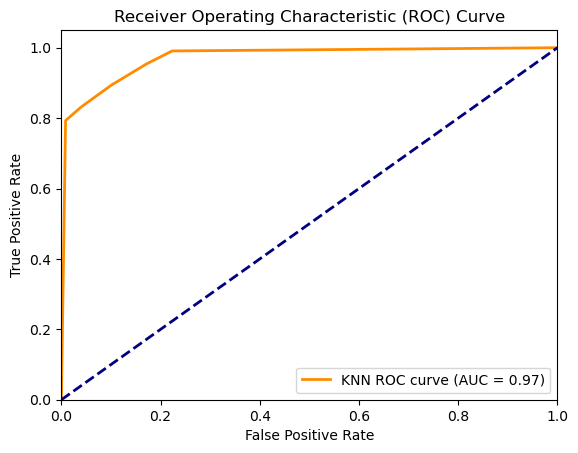

Decision Tree Metrics:
Accuracy: 0.9089
Precision: 0.9344
Recall: 0.8808
F1 Score: 0.9068
ROC AUC Score: 0.9091


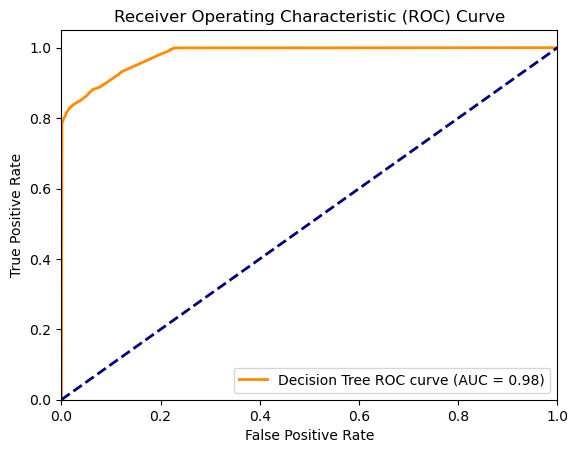

Random Forest Metrics:
Accuracy: 0.9096
Precision: 0.9653
Recall: 0.8508
F1 Score: 0.9045
ROC AUC Score: 0.9099


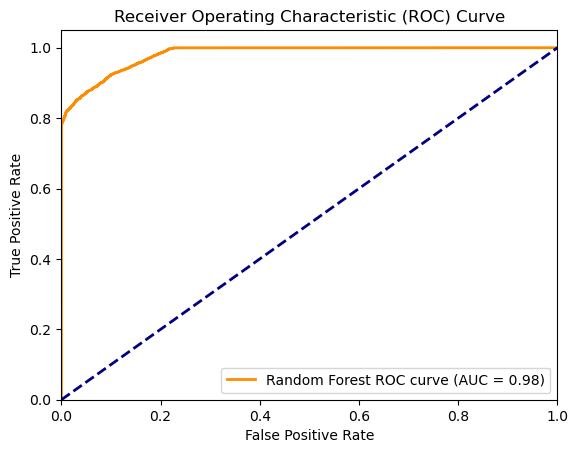

CatBoost Metrics:
Accuracy: 0.9011
Precision: 0.9185
Recall: 0.8817
F1 Score: 0.8997
ROC AUC Score: 0.9013


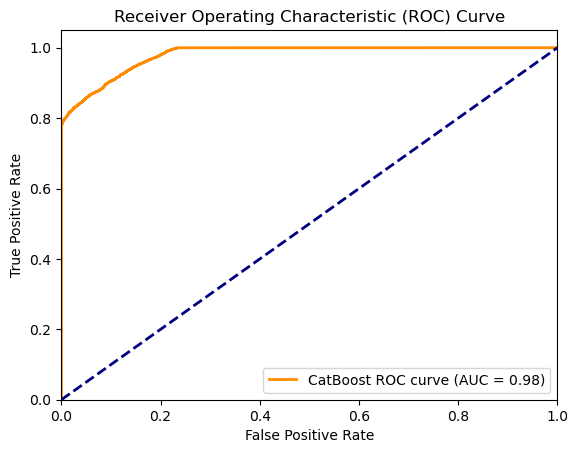

XGBoost Metrics:
Accuracy: 0.9080
Precision: 0.9377
Recall: 0.8753
F1 Score: 0.9054
ROC AUC Score: 0.9082


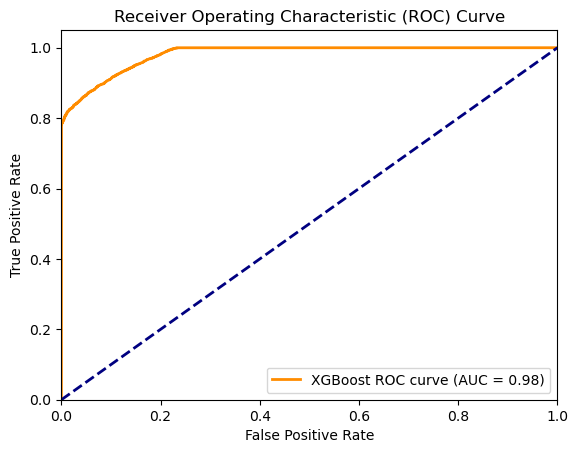

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [149]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5549212	total: 5.48ms	remaining: 5.47s
1:	learn: 0.4540733	total: 10.5ms	remaining: 5.26s
2:	learn: 0.3790785	total: 15.6ms	remaining: 5.19s
3:	learn: 0.3277448	total: 20.7ms	remaining: 5.15s
4:	learn: 0.2897347	total: 25.8ms	remaining: 5.13s
5:	learn: 0.2590692	total: 30.6ms	remaining: 5.07s
6:	learn: 0.2342452	total: 36.1ms	remaining: 5.12s
7:	learn: 0.2168747	total: 40.7ms	remaining: 5.04s
8:	learn: 0.2028739	total: 45.3ms	remaining: 4.99s
9:	learn: 0.1972771	total: 50.8ms	remaining: 5.03s
10:	learn: 0.1893611	total: 55.7ms	remaining: 5.01s
11:	learn: 0.1828078	total: 60.3ms	remaining: 4.96s
12:	learn: 0.1781421	total: 66.1ms	remaining: 5.02s
13:	learn: 0.1741336	total: 71.1ms	remaining: 5.01s
14:	learn: 0.1710848	total: 76.4ms	remaining: 5.02s
15:	learn: 0.1685354	total: 81.3ms	remaining: 5s
16:	learn: 0.1654790	total: 86.2ms	remaining: 4.99s
17:	learn: 0.1642479	total: 90.9ms	remaining: 4.96s
18:	learn: 0.1619172	total: 96ms	remaining: 4.9

185:	learn: 0.1443838	total: 1.01s	remaining: 4.42s
186:	learn: 0.1443215	total: 1.02s	remaining: 4.43s
187:	learn: 0.1442716	total: 1.02s	remaining: 4.43s
188:	learn: 0.1442140	total: 1.03s	remaining: 4.42s
189:	learn: 0.1441723	total: 1.04s	remaining: 4.42s
190:	learn: 0.1440536	total: 1.04s	remaining: 4.42s
191:	learn: 0.1440219	total: 1.05s	remaining: 4.42s
192:	learn: 0.1439902	total: 1.06s	remaining: 4.42s
193:	learn: 0.1439529	total: 1.06s	remaining: 4.42s
194:	learn: 0.1439047	total: 1.07s	remaining: 4.41s
195:	learn: 0.1438160	total: 1.07s	remaining: 4.41s
196:	learn: 0.1437815	total: 1.08s	remaining: 4.4s
197:	learn: 0.1437347	total: 1.08s	remaining: 4.39s
198:	learn: 0.1436679	total: 1.09s	remaining: 4.38s
199:	learn: 0.1436194	total: 1.09s	remaining: 4.38s
200:	learn: 0.1435695	total: 1.1s	remaining: 4.37s
201:	learn: 0.1435260	total: 1.1s	remaining: 4.36s
202:	learn: 0.1434595	total: 1.11s	remaining: 4.36s
203:	learn: 0.1434157	total: 1.11s	remaining: 4.35s
204:	learn: 0.1

382:	learn: 0.1354091	total: 2.02s	remaining: 3.25s
383:	learn: 0.1353777	total: 2.02s	remaining: 3.25s
384:	learn: 0.1353289	total: 2.03s	remaining: 3.24s
385:	learn: 0.1352812	total: 2.04s	remaining: 3.24s
386:	learn: 0.1352585	total: 2.04s	remaining: 3.23s
387:	learn: 0.1352231	total: 2.05s	remaining: 3.23s
388:	learn: 0.1351906	total: 2.05s	remaining: 3.22s
389:	learn: 0.1351420	total: 2.06s	remaining: 3.21s
390:	learn: 0.1351263	total: 2.06s	remaining: 3.21s
391:	learn: 0.1351022	total: 2.06s	remaining: 3.2s
392:	learn: 0.1350563	total: 2.07s	remaining: 3.2s
393:	learn: 0.1350430	total: 2.08s	remaining: 3.19s
394:	learn: 0.1350151	total: 2.08s	remaining: 3.19s
395:	learn: 0.1349834	total: 2.08s	remaining: 3.18s
396:	learn: 0.1349375	total: 2.09s	remaining: 3.17s
397:	learn: 0.1348916	total: 2.1s	remaining: 3.17s
398:	learn: 0.1348288	total: 2.1s	remaining: 3.16s
399:	learn: 0.1347764	total: 2.1s	remaining: 3.16s
400:	learn: 0.1347245	total: 2.11s	remaining: 3.15s
401:	learn: 0.134

543:	learn: 0.1290259	total: 2.83s	remaining: 2.37s
544:	learn: 0.1290038	total: 2.83s	remaining: 2.37s
545:	learn: 0.1289811	total: 2.84s	remaining: 2.36s
546:	learn: 0.1289427	total: 2.84s	remaining: 2.35s
547:	learn: 0.1289271	total: 2.85s	remaining: 2.35s
548:	learn: 0.1288805	total: 2.85s	remaining: 2.34s
549:	learn: 0.1288546	total: 2.86s	remaining: 2.34s
550:	learn: 0.1288270	total: 2.86s	remaining: 2.33s
551:	learn: 0.1287673	total: 2.87s	remaining: 2.33s
552:	learn: 0.1287413	total: 2.87s	remaining: 2.32s
553:	learn: 0.1287093	total: 2.88s	remaining: 2.32s
554:	learn: 0.1286722	total: 2.88s	remaining: 2.31s
555:	learn: 0.1286476	total: 2.89s	remaining: 2.31s
556:	learn: 0.1286119	total: 2.89s	remaining: 2.3s
557:	learn: 0.1285842	total: 2.9s	remaining: 2.29s
558:	learn: 0.1285428	total: 2.9s	remaining: 2.29s
559:	learn: 0.1285021	total: 2.91s	remaining: 2.29s
560:	learn: 0.1284572	total: 2.91s	remaining: 2.28s
561:	learn: 0.1284201	total: 2.92s	remaining: 2.27s
562:	learn: 0.1

703:	learn: 0.1234385	total: 3.63s	remaining: 1.53s
704:	learn: 0.1234084	total: 3.64s	remaining: 1.52s
705:	learn: 0.1233828	total: 3.65s	remaining: 1.52s
706:	learn: 0.1233427	total: 3.65s	remaining: 1.51s
707:	learn: 0.1233206	total: 3.65s	remaining: 1.51s
708:	learn: 0.1232750	total: 3.66s	remaining: 1.5s
709:	learn: 0.1232396	total: 3.67s	remaining: 1.5s
710:	learn: 0.1232177	total: 3.67s	remaining: 1.49s
711:	learn: 0.1231834	total: 3.68s	remaining: 1.49s
712:	learn: 0.1231534	total: 3.68s	remaining: 1.48s
713:	learn: 0.1231224	total: 3.69s	remaining: 1.48s
714:	learn: 0.1230842	total: 3.69s	remaining: 1.47s
715:	learn: 0.1230530	total: 3.7s	remaining: 1.47s
716:	learn: 0.1230053	total: 3.7s	remaining: 1.46s
717:	learn: 0.1229768	total: 3.71s	remaining: 1.46s
718:	learn: 0.1229495	total: 3.71s	remaining: 1.45s
719:	learn: 0.1229229	total: 3.72s	remaining: 1.45s
720:	learn: 0.1228841	total: 3.72s	remaining: 1.44s
721:	learn: 0.1228460	total: 3.73s	remaining: 1.43s
722:	learn: 0.12

862:	learn: 0.1182222	total: 4.44s	remaining: 705ms
863:	learn: 0.1181874	total: 4.45s	remaining: 700ms
864:	learn: 0.1181682	total: 4.45s	remaining: 695ms
865:	learn: 0.1181479	total: 4.46s	remaining: 690ms
866:	learn: 0.1181116	total: 4.46s	remaining: 685ms
867:	learn: 0.1180856	total: 4.47s	remaining: 680ms
868:	learn: 0.1180627	total: 4.47s	remaining: 675ms
869:	learn: 0.1180152	total: 4.48s	remaining: 669ms
870:	learn: 0.1179782	total: 4.48s	remaining: 664ms
871:	learn: 0.1179405	total: 4.49s	remaining: 659ms
872:	learn: 0.1179201	total: 4.49s	remaining: 654ms
873:	learn: 0.1178930	total: 4.5s	remaining: 649ms
874:	learn: 0.1178719	total: 4.5s	remaining: 643ms
875:	learn: 0.1178357	total: 4.51s	remaining: 638ms
876:	learn: 0.1177995	total: 4.51s	remaining: 633ms
877:	learn: 0.1177869	total: 4.52s	remaining: 628ms
878:	learn: 0.1177801	total: 4.52s	remaining: 623ms
879:	learn: 0.1177503	total: 4.53s	remaining: 618ms
880:	learn: 0.1177231	total: 4.54s	remaining: 613ms
881:	learn: 0.

In [150]:
from sklearn.base import BaseEstimator, ClassifierMixin

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [151]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

Learning rate set to 0.041939
0:	learn: 0.5877563	total: 4.97ms	remaining: 4.96s
1:	learn: 0.5032027	total: 9.05ms	remaining: 4.52s
2:	learn: 0.4347298	total: 13ms	remaining: 4.32s
3:	learn: 0.3857426	total: 16.4ms	remaining: 4.09s
4:	learn: 0.3495874	total: 19.9ms	remaining: 3.96s
5:	learn: 0.3152912	total: 23.6ms	remaining: 3.92s
6:	learn: 0.2844920	total: 28.2ms	remaining: 4.01s
7:	learn: 0.2629879	total: 32.3ms	remaining: 4s
8:	learn: 0.2456832	total: 36.1ms	remaining: 3.97s
9:	learn: 0.2377300	total: 40.9ms	remaining: 4.04s
10:	learn: 0.2257083	total: 44.3ms	remaining: 3.98s
11:	learn: 0.2124917	total: 47.5ms	remaining: 3.91s
12:	learn: 0.2045954	total: 50.4ms	remaining: 3.83s
13:	learn: 0.1970842	total: 53.6ms	remaining: 3.77s
14:	learn: 0.1917429	total: 57.3ms	remaining: 3.76s
15:	learn: 0.1864903	total: 61.3ms	remaining: 3.77s
16:	learn: 0.1817783	total: 65.1ms	remaining: 3.77s
17:	learn: 0.1769819	total: 68.6ms	remaining: 3.74s
18:	learn: 0.1732893	total: 72.3ms	remaining: 3.7

212:	learn: 0.1382836	total: 797ms	remaining: 2.94s
213:	learn: 0.1382258	total: 801ms	remaining: 2.94s
214:	learn: 0.1381714	total: 804ms	remaining: 2.94s
215:	learn: 0.1380981	total: 808ms	remaining: 2.93s
216:	learn: 0.1380095	total: 812ms	remaining: 2.93s
217:	learn: 0.1379412	total: 817ms	remaining: 2.93s
218:	learn: 0.1378922	total: 820ms	remaining: 2.92s
219:	learn: 0.1378394	total: 824ms	remaining: 2.92s
220:	learn: 0.1377929	total: 828ms	remaining: 2.92s
221:	learn: 0.1377262	total: 831ms	remaining: 2.91s
222:	learn: 0.1376632	total: 835ms	remaining: 2.91s
223:	learn: 0.1375723	total: 839ms	remaining: 2.91s
224:	learn: 0.1375119	total: 842ms	remaining: 2.9s
225:	learn: 0.1374640	total: 846ms	remaining: 2.9s
226:	learn: 0.1374332	total: 850ms	remaining: 2.89s
227:	learn: 0.1373724	total: 853ms	remaining: 2.89s
228:	learn: 0.1373216	total: 856ms	remaining: 2.88s
229:	learn: 0.1372368	total: 859ms	remaining: 2.88s
230:	learn: 0.1371798	total: 863ms	remaining: 2.87s
231:	learn: 0.

376:	learn: 0.1279365	total: 1.4s	remaining: 2.31s
377:	learn: 0.1278944	total: 1.4s	remaining: 2.31s
378:	learn: 0.1278215	total: 1.41s	remaining: 2.3s
379:	learn: 0.1277543	total: 1.41s	remaining: 2.3s
380:	learn: 0.1276992	total: 1.41s	remaining: 2.3s
381:	learn: 0.1276470	total: 1.42s	remaining: 2.29s
382:	learn: 0.1275988	total: 1.42s	remaining: 2.29s
383:	learn: 0.1275400	total: 1.43s	remaining: 2.29s
384:	learn: 0.1274762	total: 1.43s	remaining: 2.28s
385:	learn: 0.1274288	total: 1.44s	remaining: 2.28s
386:	learn: 0.1273768	total: 1.44s	remaining: 2.28s
387:	learn: 0.1273166	total: 1.44s	remaining: 2.27s
388:	learn: 0.1272559	total: 1.45s	remaining: 2.27s
389:	learn: 0.1271641	total: 1.45s	remaining: 2.27s
390:	learn: 0.1271079	total: 1.45s	remaining: 2.26s
391:	learn: 0.1270832	total: 1.46s	remaining: 2.26s
392:	learn: 0.1270325	total: 1.46s	remaining: 2.25s
393:	learn: 0.1269836	total: 1.46s	remaining: 2.25s
394:	learn: 0.1269403	total: 1.47s	remaining: 2.25s
395:	learn: 0.126

538:	learn: 0.1190704	total: 2s	remaining: 1.71s
539:	learn: 0.1190264	total: 2s	remaining: 1.71s
540:	learn: 0.1189379	total: 2.01s	remaining: 1.7s
541:	learn: 0.1188859	total: 2.01s	remaining: 1.7s
542:	learn: 0.1188411	total: 2.01s	remaining: 1.7s
543:	learn: 0.1188045	total: 2.02s	remaining: 1.69s
544:	learn: 0.1187527	total: 2.02s	remaining: 1.69s
545:	learn: 0.1187053	total: 2.03s	remaining: 1.68s
546:	learn: 0.1186674	total: 2.03s	remaining: 1.68s
547:	learn: 0.1186005	total: 2.03s	remaining: 1.68s
548:	learn: 0.1185229	total: 2.04s	remaining: 1.67s
549:	learn: 0.1184698	total: 2.04s	remaining: 1.67s
550:	learn: 0.1184304	total: 2.04s	remaining: 1.67s
551:	learn: 0.1183854	total: 2.05s	remaining: 1.66s
552:	learn: 0.1183358	total: 2.05s	remaining: 1.66s
553:	learn: 0.1182970	total: 2.05s	remaining: 1.65s
554:	learn: 0.1182479	total: 2.06s	remaining: 1.65s
555:	learn: 0.1182021	total: 2.06s	remaining: 1.65s
556:	learn: 0.1181747	total: 2.06s	remaining: 1.64s
557:	learn: 0.1181165

700:	learn: 0.1114228	total: 2.59s	remaining: 1.1s
701:	learn: 0.1113873	total: 2.6s	remaining: 1.1s
702:	learn: 0.1113478	total: 2.6s	remaining: 1.1s
703:	learn: 0.1113132	total: 2.6s	remaining: 1.09s
704:	learn: 0.1112548	total: 2.61s	remaining: 1.09s
705:	learn: 0.1112042	total: 2.61s	remaining: 1.09s
706:	learn: 0.1111616	total: 2.61s	remaining: 1.08s
707:	learn: 0.1111330	total: 2.62s	remaining: 1.08s
708:	learn: 0.1110588	total: 2.62s	remaining: 1.07s
709:	learn: 0.1110125	total: 2.63s	remaining: 1.07s
710:	learn: 0.1109828	total: 2.63s	remaining: 1.07s
711:	learn: 0.1109566	total: 2.63s	remaining: 1.06s
712:	learn: 0.1109071	total: 2.64s	remaining: 1.06s
713:	learn: 0.1108411	total: 2.64s	remaining: 1.06s
714:	learn: 0.1108047	total: 2.64s	remaining: 1.05s
715:	learn: 0.1107641	total: 2.65s	remaining: 1.05s
716:	learn: 0.1107316	total: 2.65s	remaining: 1.04s
717:	learn: 0.1107031	total: 2.65s	remaining: 1.04s
718:	learn: 0.1106585	total: 2.66s	remaining: 1.04s
719:	learn: 0.1106

868:	learn: 0.1043890	total: 3.2s	remaining: 482ms
869:	learn: 0.1043611	total: 3.2s	remaining: 478ms
870:	learn: 0.1043283	total: 3.2s	remaining: 475ms
871:	learn: 0.1042932	total: 3.21s	remaining: 471ms
872:	learn: 0.1042557	total: 3.21s	remaining: 467ms
873:	learn: 0.1042272	total: 3.22s	remaining: 464ms
874:	learn: 0.1041992	total: 3.22s	remaining: 460ms
875:	learn: 0.1041368	total: 3.22s	remaining: 456ms
876:	learn: 0.1040910	total: 3.23s	remaining: 453ms
877:	learn: 0.1040610	total: 3.23s	remaining: 449ms
878:	learn: 0.1040192	total: 3.23s	remaining: 445ms
879:	learn: 0.1039934	total: 3.24s	remaining: 441ms
880:	learn: 0.1039514	total: 3.24s	remaining: 438ms
881:	learn: 0.1039249	total: 3.24s	remaining: 434ms
882:	learn: 0.1038856	total: 3.25s	remaining: 430ms
883:	learn: 0.1038506	total: 3.25s	remaining: 427ms
884:	learn: 0.1038045	total: 3.26s	remaining: 423ms
885:	learn: 0.1037797	total: 3.26s	remaining: 419ms
886:	learn: 0.1037340	total: 3.27s	remaining: 416ms
887:	learn: 0.1

54:	learn: 0.1552247	total: 199ms	remaining: 3.43s
55:	learn: 0.1551208	total: 203ms	remaining: 3.42s
56:	learn: 0.1549272	total: 206ms	remaining: 3.41s
57:	learn: 0.1548440	total: 211ms	remaining: 3.42s
58:	learn: 0.1547670	total: 214ms	remaining: 3.42s
59:	learn: 0.1546938	total: 217ms	remaining: 3.41s
60:	learn: 0.1545895	total: 222ms	remaining: 3.42s
61:	learn: 0.1544226	total: 225ms	remaining: 3.41s
62:	learn: 0.1542417	total: 229ms	remaining: 3.4s
63:	learn: 0.1541560	total: 232ms	remaining: 3.39s
64:	learn: 0.1540886	total: 235ms	remaining: 3.38s
65:	learn: 0.1540065	total: 239ms	remaining: 3.38s
66:	learn: 0.1539453	total: 242ms	remaining: 3.37s
67:	learn: 0.1538430	total: 245ms	remaining: 3.36s
68:	learn: 0.1537937	total: 248ms	remaining: 3.35s
69:	learn: 0.1537017	total: 251ms	remaining: 3.34s
70:	learn: 0.1536184	total: 255ms	remaining: 3.34s
71:	learn: 0.1535649	total: 259ms	remaining: 3.33s
72:	learn: 0.1535061	total: 264ms	remaining: 3.35s
73:	learn: 0.1534177	total: 267m

218:	learn: 0.1430652	total: 794ms	remaining: 2.83s
219:	learn: 0.1430218	total: 797ms	remaining: 2.83s
220:	learn: 0.1429570	total: 801ms	remaining: 2.82s
221:	learn: 0.1429235	total: 805ms	remaining: 2.82s
222:	learn: 0.1428581	total: 808ms	remaining: 2.81s
223:	learn: 0.1427846	total: 812ms	remaining: 2.81s
224:	learn: 0.1427337	total: 817ms	remaining: 2.81s
225:	learn: 0.1426940	total: 821ms	remaining: 2.81s
226:	learn: 0.1426608	total: 825ms	remaining: 2.81s
227:	learn: 0.1425991	total: 829ms	remaining: 2.81s
228:	learn: 0.1425367	total: 834ms	remaining: 2.81s
229:	learn: 0.1424967	total: 838ms	remaining: 2.81s
230:	learn: 0.1424442	total: 842ms	remaining: 2.8s
231:	learn: 0.1423737	total: 846ms	remaining: 2.8s
232:	learn: 0.1422868	total: 850ms	remaining: 2.8s
233:	learn: 0.1422282	total: 853ms	remaining: 2.79s
234:	learn: 0.1421716	total: 858ms	remaining: 2.79s
235:	learn: 0.1421105	total: 863ms	remaining: 2.79s
236:	learn: 0.1420528	total: 867ms	remaining: 2.79s
237:	learn: 0.1

377:	learn: 0.1336115	total: 1.4s	remaining: 2.3s
378:	learn: 0.1335391	total: 1.4s	remaining: 2.29s
379:	learn: 0.1334865	total: 1.4s	remaining: 2.29s
380:	learn: 0.1334109	total: 1.41s	remaining: 2.28s
381:	learn: 0.1333770	total: 1.41s	remaining: 2.28s
382:	learn: 0.1333337	total: 1.41s	remaining: 2.27s
383:	learn: 0.1333045	total: 1.42s	remaining: 2.27s
384:	learn: 0.1332522	total: 1.42s	remaining: 2.27s
385:	learn: 0.1331841	total: 1.42s	remaining: 2.26s
386:	learn: 0.1331286	total: 1.43s	remaining: 2.26s
387:	learn: 0.1330789	total: 1.43s	remaining: 2.25s
388:	learn: 0.1330223	total: 1.43s	remaining: 2.25s
389:	learn: 0.1329491	total: 1.44s	remaining: 2.25s
390:	learn: 0.1328806	total: 1.44s	remaining: 2.24s
391:	learn: 0.1328587	total: 1.45s	remaining: 2.24s
392:	learn: 0.1328091	total: 1.45s	remaining: 2.24s
393:	learn: 0.1327810	total: 1.45s	remaining: 2.23s
394:	learn: 0.1327376	total: 1.46s	remaining: 2.23s
395:	learn: 0.1326555	total: 1.46s	remaining: 2.23s
396:	learn: 0.13

540:	learn: 0.1249804	total: 2s	remaining: 1.7s
541:	learn: 0.1249473	total: 2s	remaining: 1.69s
542:	learn: 0.1248873	total: 2.01s	remaining: 1.69s
543:	learn: 0.1248391	total: 2.01s	remaining: 1.69s
544:	learn: 0.1247952	total: 2.01s	remaining: 1.68s
545:	learn: 0.1247554	total: 2.02s	remaining: 1.68s
546:	learn: 0.1247132	total: 2.02s	remaining: 1.67s
547:	learn: 0.1246606	total: 2.03s	remaining: 1.67s
548:	learn: 0.1246333	total: 2.03s	remaining: 1.67s
549:	learn: 0.1246070	total: 2.03s	remaining: 1.66s
550:	learn: 0.1245434	total: 2.04s	remaining: 1.66s
551:	learn: 0.1245277	total: 2.04s	remaining: 1.66s
552:	learn: 0.1244933	total: 2.04s	remaining: 1.65s
553:	learn: 0.1244371	total: 2.05s	remaining: 1.65s
554:	learn: 0.1244037	total: 2.05s	remaining: 1.64s
555:	learn: 0.1243541	total: 2.05s	remaining: 1.64s
556:	learn: 0.1242954	total: 2.06s	remaining: 1.64s
557:	learn: 0.1242332	total: 2.06s	remaining: 1.63s
558:	learn: 0.1241934	total: 2.06s	remaining: 1.63s
559:	learn: 0.12413

704:	learn: 0.1174390	total: 2.6s	remaining: 1.09s
705:	learn: 0.1173883	total: 2.61s	remaining: 1.08s
706:	learn: 0.1173625	total: 2.61s	remaining: 1.08s
707:	learn: 0.1173210	total: 2.61s	remaining: 1.08s
708:	learn: 0.1172961	total: 2.62s	remaining: 1.07s
709:	learn: 0.1172552	total: 2.62s	remaining: 1.07s
710:	learn: 0.1172200	total: 2.62s	remaining: 1.07s
711:	learn: 0.1171858	total: 2.63s	remaining: 1.06s
712:	learn: 0.1171548	total: 2.63s	remaining: 1.06s
713:	learn: 0.1171093	total: 2.63s	remaining: 1.05s
714:	learn: 0.1170769	total: 2.64s	remaining: 1.05s
715:	learn: 0.1170370	total: 2.64s	remaining: 1.05s
716:	learn: 0.1169942	total: 2.65s	remaining: 1.04s
717:	learn: 0.1169545	total: 2.65s	remaining: 1.04s
718:	learn: 0.1169179	total: 2.65s	remaining: 1.04s
719:	learn: 0.1168753	total: 2.66s	remaining: 1.03s
720:	learn: 0.1168338	total: 2.66s	remaining: 1.03s
721:	learn: 0.1167942	total: 2.66s	remaining: 1.02s
722:	learn: 0.1167534	total: 2.67s	remaining: 1.02s
723:	learn: 0

870:	learn: 0.1105038	total: 3.2s	remaining: 474ms
871:	learn: 0.1104701	total: 3.21s	remaining: 471ms
872:	learn: 0.1104350	total: 3.21s	remaining: 467ms
873:	learn: 0.1103911	total: 3.21s	remaining: 463ms
874:	learn: 0.1103509	total: 3.22s	remaining: 459ms
875:	learn: 0.1102993	total: 3.22s	remaining: 456ms
876:	learn: 0.1102550	total: 3.22s	remaining: 452ms
877:	learn: 0.1102302	total: 3.23s	remaining: 449ms
878:	learn: 0.1101903	total: 3.23s	remaining: 445ms
879:	learn: 0.1101444	total: 3.24s	remaining: 441ms
880:	learn: 0.1101148	total: 3.24s	remaining: 438ms
881:	learn: 0.1100960	total: 3.24s	remaining: 434ms
882:	learn: 0.1100471	total: 3.25s	remaining: 430ms
883:	learn: 0.1100159	total: 3.25s	remaining: 427ms
884:	learn: 0.1099563	total: 3.25s	remaining: 423ms
885:	learn: 0.1099234	total: 3.26s	remaining: 419ms
886:	learn: 0.1098997	total: 3.26s	remaining: 415ms
887:	learn: 0.1098651	total: 3.26s	remaining: 412ms
888:	learn: 0.1098364	total: 3.27s	remaining: 408ms
889:	learn: 0

39:	learn: 0.1524950	total: 200ms	remaining: 4.8s
40:	learn: 0.1524368	total: 206ms	remaining: 4.81s
41:	learn: 0.1523392	total: 211ms	remaining: 4.8s
42:	learn: 0.1522869	total: 216ms	remaining: 4.8s
43:	learn: 0.1519758	total: 222ms	remaining: 4.81s
44:	learn: 0.1519153	total: 226ms	remaining: 4.8s
45:	learn: 0.1518477	total: 231ms	remaining: 4.79s
46:	learn: 0.1517738	total: 236ms	remaining: 4.79s
47:	learn: 0.1516223	total: 242ms	remaining: 4.8s
48:	learn: 0.1515705	total: 247ms	remaining: 4.79s
49:	learn: 0.1515218	total: 251ms	remaining: 4.78s
50:	learn: 0.1514608	total: 257ms	remaining: 4.78s
51:	learn: 0.1514089	total: 262ms	remaining: 4.78s
52:	learn: 0.1513754	total: 267ms	remaining: 4.77s
53:	learn: 0.1513191	total: 273ms	remaining: 4.78s
54:	learn: 0.1511976	total: 278ms	remaining: 4.77s
55:	learn: 0.1510378	total: 283ms	remaining: 4.78s
56:	learn: 0.1509190	total: 289ms	remaining: 4.77s
57:	learn: 0.1508851	total: 294ms	remaining: 4.78s
58:	learn: 0.1507942	total: 300ms	re

237:	learn: 0.1417952	total: 1.21s	remaining: 3.87s
238:	learn: 0.1417522	total: 1.21s	remaining: 3.87s
239:	learn: 0.1417022	total: 1.22s	remaining: 3.86s
240:	learn: 0.1416563	total: 1.22s	remaining: 3.86s
241:	learn: 0.1416102	total: 1.23s	remaining: 3.85s
242:	learn: 0.1415658	total: 1.24s	remaining: 3.85s
243:	learn: 0.1415199	total: 1.24s	remaining: 3.85s
244:	learn: 0.1414734	total: 1.25s	remaining: 3.84s
245:	learn: 0.1414225	total: 1.25s	remaining: 3.84s
246:	learn: 0.1413857	total: 1.26s	remaining: 3.83s
247:	learn: 0.1413447	total: 1.26s	remaining: 3.83s
248:	learn: 0.1412953	total: 1.27s	remaining: 3.83s
249:	learn: 0.1412398	total: 1.27s	remaining: 3.82s
250:	learn: 0.1412092	total: 1.28s	remaining: 3.82s
251:	learn: 0.1411287	total: 1.28s	remaining: 3.81s
252:	learn: 0.1410801	total: 1.29s	remaining: 3.8s
253:	learn: 0.1410075	total: 1.29s	remaining: 3.8s
254:	learn: 0.1409702	total: 1.3s	remaining: 3.79s
255:	learn: 0.1409252	total: 1.3s	remaining: 3.79s
256:	learn: 0.14

396:	learn: 0.1349375	total: 2.02s	remaining: 3.06s
397:	learn: 0.1348916	total: 2.02s	remaining: 3.06s
398:	learn: 0.1348288	total: 2.03s	remaining: 3.05s
399:	learn: 0.1347764	total: 2.03s	remaining: 3.05s
400:	learn: 0.1347245	total: 2.04s	remaining: 3.04s
401:	learn: 0.1346641	total: 2.04s	remaining: 3.04s
402:	learn: 0.1346227	total: 2.05s	remaining: 3.03s
403:	learn: 0.1345860	total: 2.05s	remaining: 3.03s
404:	learn: 0.1345177	total: 2.06s	remaining: 3.02s
405:	learn: 0.1344949	total: 2.06s	remaining: 3.02s
406:	learn: 0.1344450	total: 2.07s	remaining: 3.01s
407:	learn: 0.1344117	total: 2.07s	remaining: 3.01s
408:	learn: 0.1343576	total: 2.08s	remaining: 3s
409:	learn: 0.1343178	total: 2.08s	remaining: 3s
410:	learn: 0.1342783	total: 2.09s	remaining: 2.99s
411:	learn: 0.1342306	total: 2.09s	remaining: 2.99s
412:	learn: 0.1341950	total: 2.1s	remaining: 2.98s
413:	learn: 0.1341684	total: 2.1s	remaining: 2.98s
414:	learn: 0.1341296	total: 2.11s	remaining: 2.97s
415:	learn: 0.134086

555:	learn: 0.1286476	total: 2.82s	remaining: 2.25s
556:	learn: 0.1286119	total: 2.83s	remaining: 2.25s
557:	learn: 0.1285842	total: 2.83s	remaining: 2.24s
558:	learn: 0.1285428	total: 2.84s	remaining: 2.24s
559:	learn: 0.1285021	total: 2.84s	remaining: 2.23s
560:	learn: 0.1284572	total: 2.85s	remaining: 2.23s
561:	learn: 0.1284201	total: 2.85s	remaining: 2.22s
562:	learn: 0.1283767	total: 2.85s	remaining: 2.22s
563:	learn: 0.1283440	total: 2.86s	remaining: 2.21s
564:	learn: 0.1283101	total: 2.87s	remaining: 2.21s
565:	learn: 0.1282916	total: 2.87s	remaining: 2.2s
566:	learn: 0.1282651	total: 2.88s	remaining: 2.2s
567:	learn: 0.1282157	total: 2.88s	remaining: 2.19s
568:	learn: 0.1281733	total: 2.88s	remaining: 2.19s
569:	learn: 0.1281368	total: 2.89s	remaining: 2.18s
570:	learn: 0.1281100	total: 2.9s	remaining: 2.17s
571:	learn: 0.1280812	total: 2.9s	remaining: 2.17s
572:	learn: 0.1280421	total: 2.9s	remaining: 2.17s
573:	learn: 0.1280092	total: 2.91s	remaining: 2.16s
574:	learn: 0.127

717:	learn: 0.1229768	total: 3.63s	remaining: 1.43s
718:	learn: 0.1229495	total: 3.64s	remaining: 1.42s
719:	learn: 0.1229229	total: 3.64s	remaining: 1.42s
720:	learn: 0.1228841	total: 3.65s	remaining: 1.41s
721:	learn: 0.1228460	total: 3.65s	remaining: 1.41s
722:	learn: 0.1228121	total: 3.66s	remaining: 1.4s
723:	learn: 0.1227765	total: 3.66s	remaining: 1.4s
724:	learn: 0.1227437	total: 3.67s	remaining: 1.39s
725:	learn: 0.1227247	total: 3.67s	remaining: 1.39s
726:	learn: 0.1226938	total: 3.68s	remaining: 1.38s
727:	learn: 0.1226712	total: 3.68s	remaining: 1.38s
728:	learn: 0.1226400	total: 3.69s	remaining: 1.37s
729:	learn: 0.1226116	total: 3.69s	remaining: 1.36s
730:	learn: 0.1225748	total: 3.7s	remaining: 1.36s
731:	learn: 0.1225456	total: 3.7s	remaining: 1.35s
732:	learn: 0.1225153	total: 3.71s	remaining: 1.35s
733:	learn: 0.1224897	total: 3.71s	remaining: 1.34s
734:	learn: 0.1224342	total: 3.72s	remaining: 1.34s
735:	learn: 0.1224015	total: 3.72s	remaining: 1.33s
736:	learn: 0.12

879:	learn: 0.1177503	total: 4.45s	remaining: 606ms
880:	learn: 0.1177231	total: 4.45s	remaining: 602ms
881:	learn: 0.1177084	total: 4.46s	remaining: 596ms
882:	learn: 0.1176606	total: 4.46s	remaining: 591ms
883:	learn: 0.1176301	total: 4.47s	remaining: 586ms
884:	learn: 0.1176016	total: 4.47s	remaining: 581ms
885:	learn: 0.1175615	total: 4.48s	remaining: 576ms
886:	learn: 0.1175241	total: 4.48s	remaining: 571ms
887:	learn: 0.1174727	total: 4.49s	remaining: 566ms
888:	learn: 0.1174309	total: 4.49s	remaining: 561ms
889:	learn: 0.1173809	total: 4.5s	remaining: 556ms
890:	learn: 0.1173451	total: 4.5s	remaining: 551ms
891:	learn: 0.1173213	total: 4.51s	remaining: 546ms
892:	learn: 0.1172705	total: 4.51s	remaining: 541ms
893:	learn: 0.1172453	total: 4.52s	remaining: 536ms
894:	learn: 0.1172008	total: 4.52s	remaining: 531ms
895:	learn: 0.1171587	total: 4.53s	remaining: 526ms
896:	learn: 0.1171194	total: 4.53s	remaining: 521ms
897:	learn: 0.1170952	total: 4.54s	remaining: 516ms
898:	learn: 0.

## **ROC Curve and Confusion Matrix for ML Ensemble**

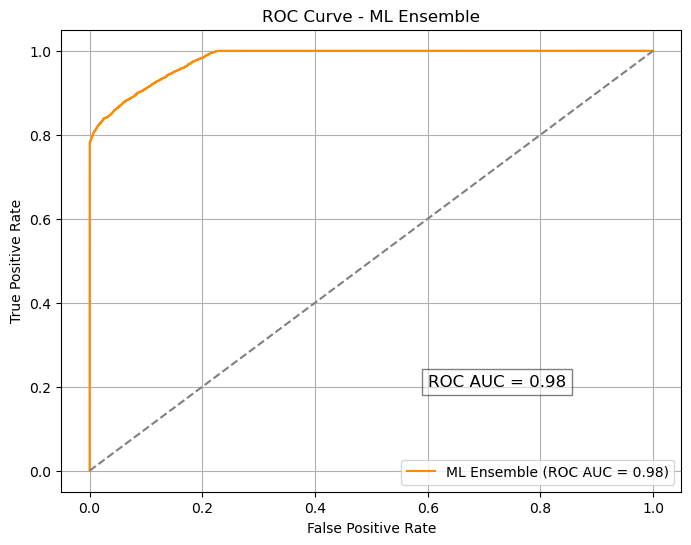

<Figure size 800x600 with 0 Axes>

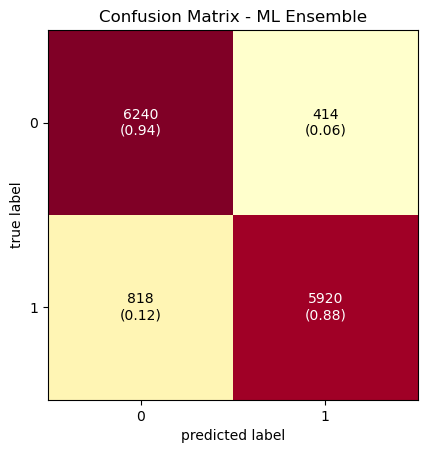

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

419/419 [==============================] - 0s 291us/step


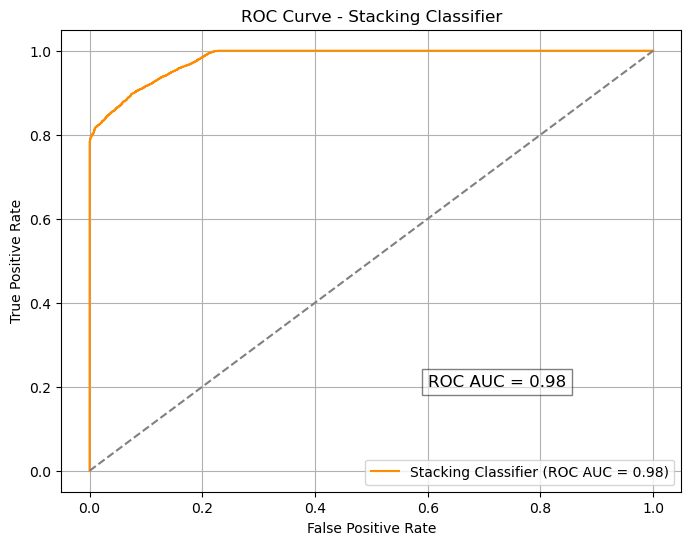

<Figure size 800x600 with 0 Axes>

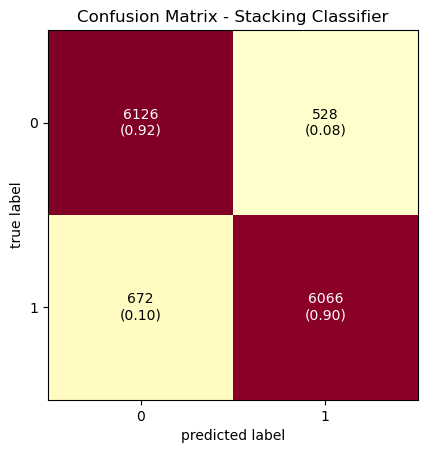

In [153]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


## ALL ENSEMBLE

In [154]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

Learning rate set to 0.056385
0:	learn: 0.5549212	total: 5.37ms	remaining: 5.36s
1:	learn: 0.4540733	total: 10.7ms	remaining: 5.34s
2:	learn: 0.3790785	total: 15.8ms	remaining: 5.25s
3:	learn: 0.3277448	total: 20.9ms	remaining: 5.2s
4:	learn: 0.2897347	total: 25.9ms	remaining: 5.15s
5:	learn: 0.2590692	total: 30.5ms	remaining: 5.06s
6:	learn: 0.2342452	total: 35.4ms	remaining: 5.02s
7:	learn: 0.2168747	total: 40.5ms	remaining: 5.02s
8:	learn: 0.2028739	total: 45.4ms	remaining: 4.99s
9:	learn: 0.1972771	total: 50.3ms	remaining: 4.98s
10:	learn: 0.1893611	total: 55.1ms	remaining: 4.95s
11:	learn: 0.1828078	total: 60.1ms	remaining: 4.94s
12:	learn: 0.1781421	total: 65.9ms	remaining: 5s
13:	learn: 0.1741336	total: 70.6ms	remaining: 4.97s
14:	learn: 0.1710848	total: 75.2ms	remaining: 4.94s
15:	learn: 0.1685354	total: 80.3ms	remaining: 4.94s
16:	learn: 0.1654790	total: 85.2ms	remaining: 4.92s
17:	learn: 0.1642479	total: 89.6ms	remaining: 4.89s
18:	learn: 0.1619172	total: 95ms	remaining: 4.9s

198:	learn: 0.1436679	total: 1.01s	remaining: 4.07s
199:	learn: 0.1436194	total: 1.01s	remaining: 4.06s
200:	learn: 0.1435695	total: 1.02s	remaining: 4.06s
201:	learn: 0.1435260	total: 1.02s	remaining: 4.05s
202:	learn: 0.1434595	total: 1.03s	remaining: 4.05s
203:	learn: 0.1434157	total: 1.03s	remaining: 4.04s
204:	learn: 0.1433754	total: 1.04s	remaining: 4.04s
205:	learn: 0.1433409	total: 1.04s	remaining: 4.03s
206:	learn: 0.1433029	total: 1.05s	remaining: 4.02s
207:	learn: 0.1432635	total: 1.05s	remaining: 4.02s
208:	learn: 0.1432269	total: 1.06s	remaining: 4.02s
209:	learn: 0.1431817	total: 1.07s	remaining: 4.01s
210:	learn: 0.1430635	total: 1.07s	remaining: 4.01s
211:	learn: 0.1430086	total: 1.08s	remaining: 4s
212:	learn: 0.1429533	total: 1.08s	remaining: 3.99s
213:	learn: 0.1428989	total: 1.08s	remaining: 3.99s
214:	learn: 0.1428726	total: 1.09s	remaining: 3.98s
215:	learn: 0.1428231	total: 1.09s	remaining: 3.98s
216:	learn: 0.1427706	total: 1.1s	remaining: 3.97s
217:	learn: 0.14

359:	learn: 0.1363930	total: 1.82s	remaining: 3.23s
360:	learn: 0.1363362	total: 1.82s	remaining: 3.23s
361:	learn: 0.1362993	total: 1.83s	remaining: 3.23s
362:	learn: 0.1362516	total: 1.83s	remaining: 3.22s
363:	learn: 0.1361965	total: 1.84s	remaining: 3.21s
364:	learn: 0.1361551	total: 1.84s	remaining: 3.21s
365:	learn: 0.1361117	total: 1.85s	remaining: 3.2s
366:	learn: 0.1360727	total: 1.85s	remaining: 3.2s
367:	learn: 0.1360325	total: 1.86s	remaining: 3.19s
368:	learn: 0.1359883	total: 1.86s	remaining: 3.19s
369:	learn: 0.1359376	total: 1.87s	remaining: 3.18s
370:	learn: 0.1358994	total: 1.88s	remaining: 3.18s
371:	learn: 0.1358532	total: 1.88s	remaining: 3.17s
372:	learn: 0.1358000	total: 1.89s	remaining: 3.17s
373:	learn: 0.1357542	total: 1.89s	remaining: 3.17s
374:	learn: 0.1357250	total: 1.9s	remaining: 3.16s
375:	learn: 0.1356694	total: 1.9s	remaining: 3.15s
376:	learn: 0.1356238	total: 1.91s	remaining: 3.15s
377:	learn: 0.1355795	total: 1.91s	remaining: 3.14s
378:	learn: 0.13

519:	learn: 0.1298690	total: 2.63s	remaining: 2.42s
520:	learn: 0.1298412	total: 2.63s	remaining: 2.42s
521:	learn: 0.1298059	total: 2.64s	remaining: 2.42s
522:	learn: 0.1297652	total: 2.64s	remaining: 2.41s
523:	learn: 0.1297252	total: 2.65s	remaining: 2.4s
524:	learn: 0.1296886	total: 2.65s	remaining: 2.4s
525:	learn: 0.1296317	total: 2.66s	remaining: 2.4s
526:	learn: 0.1295893	total: 2.66s	remaining: 2.39s
527:	learn: 0.1295512	total: 2.67s	remaining: 2.38s
528:	learn: 0.1295220	total: 2.67s	remaining: 2.38s
529:	learn: 0.1294788	total: 2.68s	remaining: 2.38s
530:	learn: 0.1294376	total: 2.68s	remaining: 2.37s
531:	learn: 0.1294058	total: 2.69s	remaining: 2.37s
532:	learn: 0.1293714	total: 2.69s	remaining: 2.36s
533:	learn: 0.1293513	total: 2.7s	remaining: 2.35s
534:	learn: 0.1293265	total: 2.7s	remaining: 2.35s
535:	learn: 0.1292878	total: 2.71s	remaining: 2.35s
536:	learn: 0.1292451	total: 2.71s	remaining: 2.34s
537:	learn: 0.1292170	total: 2.72s	remaining: 2.33s
538:	learn: 0.129

679:	learn: 0.1242132	total: 3.43s	remaining: 1.62s
680:	learn: 0.1241854	total: 3.44s	remaining: 1.61s
681:	learn: 0.1241644	total: 3.44s	remaining: 1.61s
682:	learn: 0.1241048	total: 3.45s	remaining: 1.6s
683:	learn: 0.1240711	total: 3.46s	remaining: 1.6s
684:	learn: 0.1240390	total: 3.46s	remaining: 1.59s
685:	learn: 0.1240036	total: 3.46s	remaining: 1.59s
686:	learn: 0.1239690	total: 3.47s	remaining: 1.58s
687:	learn: 0.1239367	total: 3.48s	remaining: 1.58s
688:	learn: 0.1239008	total: 3.48s	remaining: 1.57s
689:	learn: 0.1238595	total: 3.48s	remaining: 1.57s
690:	learn: 0.1238296	total: 3.49s	remaining: 1.56s
691:	learn: 0.1238040	total: 3.5s	remaining: 1.56s
692:	learn: 0.1237811	total: 3.5s	remaining: 1.55s
693:	learn: 0.1237642	total: 3.5s	remaining: 1.54s
694:	learn: 0.1237417	total: 3.51s	remaining: 1.54s
695:	learn: 0.1237004	total: 3.52s	remaining: 1.53s
696:	learn: 0.1236642	total: 3.52s	remaining: 1.53s
697:	learn: 0.1236346	total: 3.52s	remaining: 1.52s
698:	learn: 0.123

839:	learn: 0.1188818	total: 4.24s	remaining: 807ms
840:	learn: 0.1188551	total: 4.24s	remaining: 802ms
841:	learn: 0.1188341	total: 4.25s	remaining: 797ms
842:	learn: 0.1187994	total: 4.25s	remaining: 792ms
843:	learn: 0.1187725	total: 4.26s	remaining: 787ms
844:	learn: 0.1187418	total: 4.26s	remaining: 782ms
845:	learn: 0.1187067	total: 4.27s	remaining: 777ms
846:	learn: 0.1186744	total: 4.27s	remaining: 772ms
847:	learn: 0.1186521	total: 4.28s	remaining: 767ms
848:	learn: 0.1186183	total: 4.28s	remaining: 762ms
849:	learn: 0.1185955	total: 4.29s	remaining: 757ms
850:	learn: 0.1185717	total: 4.29s	remaining: 752ms
851:	learn: 0.1185366	total: 4.3s	remaining: 747ms
852:	learn: 0.1184992	total: 4.3s	remaining: 742ms
853:	learn: 0.1184776	total: 4.31s	remaining: 737ms
854:	learn: 0.1184588	total: 4.31s	remaining: 732ms
855:	learn: 0.1184356	total: 4.32s	remaining: 727ms
856:	learn: 0.1184056	total: 4.32s	remaining: 722ms
857:	learn: 0.1183815	total: 4.33s	remaining: 717ms
858:	learn: 0.

997:	learn: 0.1141235	total: 5.04s	remaining: 10.1ms
998:	learn: 0.1140891	total: 5.05s	remaining: 5.05ms
999:	learn: 0.1140642	total: 5.05s	remaining: 0us
Accuracy of Ensemble of DL and ML: 0.9080047789725209


In [155]:
all_ensemble_accuracy = metrics.accuracy_score(y_test, all_pred)
all_ensemble_precision = precision_score(y_test, all_pred)
all_ensemble_recall = recall_score(y_test, all_pred)
all_ensemble_f1 = f1_score(y_test, all_pred)
all_ensemble_roc_auc = roc_auc_score(y_test, all_pred)

print("Ensemble of DL and ML Metrics:")
print(f"Accuracy: {all_ensemble_accuracy:.4f}")
print(f"Precision: {all_ensemble_precision:.4f}")
print(f"Recall: {all_ensemble_recall:.4f}")
print(f"F1 Score: {all_ensemble_f1:.4f}")
print(f"ROC AUC Score: {all_ensemble_roc_auc:.4f}")

Ensemble of DL and ML Metrics:
Accuracy: 0.9080
Precision: 0.9346
Recall: 0.8786
F1 Score: 0.9058
ROC AUC Score: 0.9082
